# Practical Statistics for Data Science with SciPy - Part 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Chapter 4: The Core of Inference - From Estimation to Hypothesis Testing

This chapter provides a comprehensive guide to statistical inference. We'll start with a real-world problem and explore how analysts use confidence intervals and hypothesis tests to make reliable, data-driven decisions.

## Quantifying Uncertainty with Confidence Intervals

Imagine a new vitamin supplement is tested on a sample of 40 people, and their average increase in energy is found to be 5.2 points.

### The Problem with a Single Number

Our observed difference of 5.2 is a **point estimate**. It's our single best guess, but it's fragile. If we ran the test again with different subjects, we'd get a slightly different result—maybe 4.2, maybe 5.5. Relying on one number is risky because it gives us no sense of the underlying uncertainty.

### The Solution: The Confidence Interval

A **Confidence Interval (CI)** is a much better tool. Instead of a single number, it gives us a **range of plausible values** for the true difference.
We don’t know the true average for the entire population, so we calculate a 95% confidence interval.



In [3]:
from statsmodels.stats.weightstats import DescrStatsW

data = np.random.normal(100, 15, 50)
descr = DescrStatsW(data)

In [4]:
descr.mean, descr.var

(np.float64(99.03857092761098), np.float64(156.60854239778115))

In [8]:
ci_low, ci_upp = descr.tconfint_mean(alpha=0.05)
print(f"Confidence interval: [{ci_low:.2f}, {ci_upp:.2f}]")

Confidence interval: [95.45, 102.63]


In [10]:
# Higher confidence level (lower alpha) means a wider interval)

ci_low, ci_upp = descr.tconfint_mean(alpha=0.01)
print(f"Confidence interval: [{ci_low:.2f}, {ci_upp:.2f}]")

Confidence interval: [94.25, 103.83]


What does "95% confidence" mean?

It means that if we repeated the same experiment many times and calculated a confidence interval each time, about 95% of those intervals would contain the true value we’re trying to estimate.

It does not mean there's a 95% chance that the true value is in this specific interval — the true value is fixed, and the interval either contains it or it doesn’t.

### The Scenario: A Classic A/B Test - Now we have 2 groups

Imagine we work for an e-commerce company. We've designed a new website layout (Version B) that we believe will make customers spend more money than the old layout (Version A).

We run an A/B test and find that the average spending for users of Design B is **$5 higher** than for users of Design A. The question is: is this $5 difference a **real improvement** or just **random chance**?

In [18]:
from statsmodels.stats.weightstats import CompareMeans

# Original, larger dataset
np.random.seed(42)
group_a_spending = np.random.normal(loc=50, scale=15, size=1000)
group_b_spending = np.random.normal(loc=52, scale=15, size=1000)

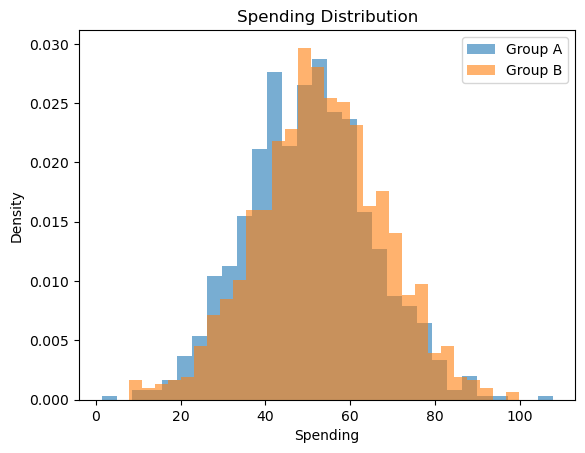

In [19]:
# Plot histograms
plt.hist(group_a_spending, bins=30, alpha=0.6, label='Group A', density=True)
plt.hist(group_b_spending, bins=30, alpha=0.6, label='Group B', density=True)

# Add legend and labels
plt.title('Spending Distribution')
plt.xlabel('Spending')
plt.ylabel('Density')
plt.legend()
plt.show()

The code below is performing a statistical test to estimate **how different two groups are in terms of their average values (means)**.

Specifically, it's trying to answer this question:

“Is the difference we observe between the two sample means likely due to real differences in the populations, or could it just be random variation?”

To do that, the code computes a confidence interval for the difference in means.
If this interval includes 0, it means the data is consistent with “no real difference.”
If it excludes 0, it suggests a statistically significant difference between the groups.

In [20]:
cm = CompareMeans.from_data(group_a_spending, group_b_spending)
lower_ci, upper_ci = cm.tconfint_diff(alpha=0.05)
print(f"95% Confidence Interval for the Difference: [${lower_ci:.2f}, ${upper_ci:.2f}]")

95% Confidence Interval for the Difference: [$-4.07, $-1.47]


In [23]:
cm = CompareMeans.from_data(group_a_spending, group_b_spending)
lower_ci, upper_ci = cm.tconfint_diff(alpha=0.01)
print(f"95% Confidence Interval for the Difference: [${lower_ci:.2f}, ${upper_ci:.2f}]")

95% Confidence Interval for the Difference: [$-4.48, $-1.06]


The most important rule for using a CI to make a decision is:
**If the confidence interval does NOT contain zero, the difference is statistically significant.**

## T-test - an Alternative for CI as statistical test

### Formalizing with a T-test and P-value
The T-test is the formal hypothesis test that provides a **p-value**.
- **Null Hypothesis ($H_0$)**: There is no real difference between the designs.
- **Alternative Hypothesis ($H_a$)**: There is a real difference.
The **p-value** is the probability of seeing our data if the null hypothesis were true. A small p-value (< 0.05) means we reject the null hypothesis.

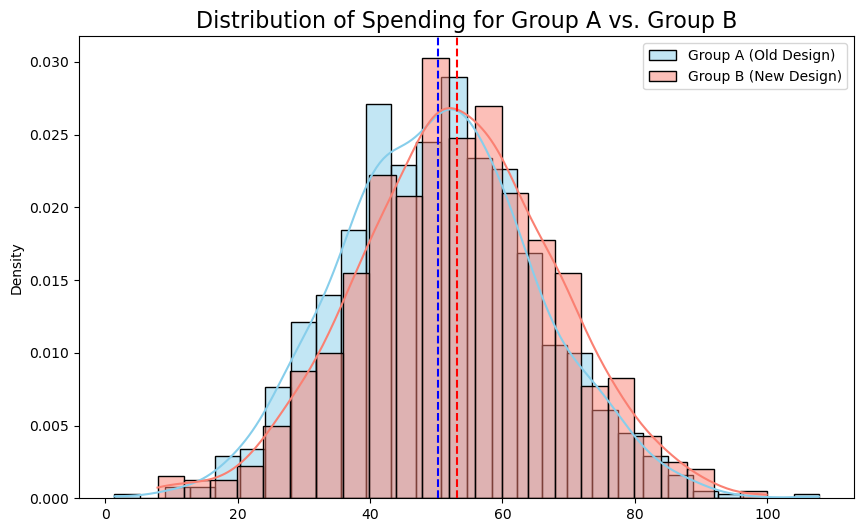

In [24]:
# Plot the distributions of our two sample groups
plt.figure(figsize=(10, 6))
sns.histplot(group_a_spending, color='skyblue', label='Group A (Old Design)', kde=True, stat='density')
sns.histplot(group_b_spending, color='salmon', label='Group B (New Design)', kde=True, stat='density')
plt.axvline(np.mean(group_a_spending), color='blue', linestyle='--')
plt.axvline(np.mean(group_b_spending), color='red', linestyle='--')
plt.title('Distribution of Spending for Group A vs. Group B', fontsize=16)
plt.legend()
plt.show()


In [ ]:
# Perform an independent two-sample T-test on the same data
t_statistic, p_value = stats.ttest_ind(group_b_spending, group_a_spending)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

This time you need to choose alpha in advance in order to decide whether to accept or reject the null hypothesis!

### The Final Verdict
The tiny p-value (`0.0000`) and the fact that our confidence interval does not contain zero both lead to the same, confident conclusion:

We **reject the null hypothesis**. The new website design leads to a statistically significant increase in customer spending.

## What about the case ehre the two populations have different in variance?

In [ ]:
lower_ci, upper_ci = cm.tconfint_diff(alpha=0.05, usevar='unequal')
print(f"95% Confidence Interval for the Difference: [${lower_ci:.2f}, ${upper_ci:.2f}]")

In [ ]:
t_statistic, p_value = stats.ttest_ind(group_b_spending, group_a_spending, equal_var=False)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Chapter 5: Comparing Multiple Groups with ANOVA

So far, we've mastered comparing two groups with T-tests. But what happens when we need to compare three, four, or even more groups? For example, let's say we want to test three different website headlines (A, B, and C) to see which one results in the most time spent on the page.

This is where **Analysis of Variance (ANOVA)** comes in. It's the statistical tool designed specifically for comparing the means of multiple groups at once.

### Why Not Just Run Multiple T-tests?

Your first instinct might be to just run several T-tests (A vs. B, B vs. C, and A vs. C). This is a very common mistake.

The problem is **error inflation**. Every time you run a statistical test, there's a small chance of an error — a false positive where you find a significant result that's actually just due to random luck. If your significance level is 0.05, you have a 5% chance of this error.

When you run multiple tests, these chances add up. The more tests you run, the higher your overall probability of getting a false positive becomes. ANOVA solves this by analyzing all groups simultaneously in a single test.

## One-Way ANOVA: The Core Idea

The name "Analysis of Variance" gives a clue to how it works. ANOVA compares the **variance between the groups** to the **variance within each group**.

**Intuition:** If the variation *between* the group means is much larger than the random noise *within* each group, it suggests that there is a real difference between the groups.

This comparison is summarized in a single number: the **F-statistic**.

$$ \text{F-statistic} = \frac{\text{Variance between groups}}{\text{Variance within groups}} $$

### ANOVA's Hypotheses

- **Null Hypothesis ($H_0$)**: The means of all groups are equal. ($ \mu_A = \mu_B = \mu_C $). None of the headlines have a different effect on time spent.
- **Alternative Hypothesis ($H_a$)**: **At least one** group mean is different from the others. It doesn't tell us which one, just that they are not all the same.

In [1]:
import numpy as np
from scipy import stats

# Simulate data for our three headlines
np.random.seed(42)
time_headline_a = np.random.normal(loc=120, scale=30, size=100) # Avg 120 seconds
time_headline_b = np.random.normal(loc=125, scale=30, size=100) # Avg 125 seconds
time_headline_c = np.random.normal(loc=145, scale=30, size=100) # Avg 145 seconds

# Perform a One-Way ANOVA
f_statistic, p_value = stats.f_oneway(time_headline_a, time_headline_b, time_headline_c)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 27.37
P-value: 0.0000


### Interpreting the Result

We got a very small p-value (`0.0000`). Since this is well below our significance level of 0.05, we **reject the null hypothesis**.

**Conclusion:** We have strong evidence that at least one of the headlines results in a different average time spent on the page. The headlines are not all equally effective.

## The Follow-up Question: So, Which Group is Different?

The ANOVA test is an "omnibus" test—it tells us *if* there's a difference, but not *where* the difference is. Is C better than A and B? Is B better than A?

To answer this, we need to perform a **post-hoc test** (which means "after this"). A popular choice is the **Tukey's Honestly Significant Difference (HSD)** test, which compares every possible pair of groups in a way that doesn't inflate the error rate.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# We need to structure our data correctly for the post-hoc test
# 1. Combine all the data into one array
all_data = np.concatenate([time_headline_a, time_headline_b, time_headline_c])

# 2. Create an array of group labels
group_labels = ['A'] * 100 + ['B'] * 100 + ['C'] * 100

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=all_data, groups=group_labels, alpha=0.05)

# Print the results
print(tukey_result)

# Chapter 5.1 - Two-Way ANOVA (?)

# Chapter 6 - Non-Parametric tests

- What if the data isn't normally distributed and you have small sample?
- What if you do have big sample, but the data is highly skewed?
- What if you have no continous varaible, but an ordinally one (Then you can't compute an average)?

# Chapter 7 - Categorial Variables

*Motivation:** How do we test for a relationship between two categorical variables We can't use a t-test.

Imagine a beverage company wants to know if there's a relationship between age group (Variable 1: "Young," "Adult") and soda preference (Variable 2: "Coke," "Sprite").

The tool for this is the **Chi-Square Test of Independence**. H₀: The two variables are independent (there is no relationship).

# Chapter 8 - Correlation

## What is Correlation? The Core Idea

**Correlation** measures the direction and strength of the relationship between two variables. The best way to see this is with a **scatterplot**. Scatterplots instantly reveal the pattern of the relationship.

- **Positive Correlation:** As one variable increases, the other tends to increase.
- **Negative Correlation:** As one variable increases, the other tends to decrease.
- **No Correlation:** There is no discernible pattern between the two variables.


## 1. Visualizing Relationships with Scatterplots

Before we calculate any numbers, we should always visualize the data. The **scatterplot** is the primary tool for exploring the relationship between two variables. It helps us instantly see the **direction** and **strength** of a potential correlation.

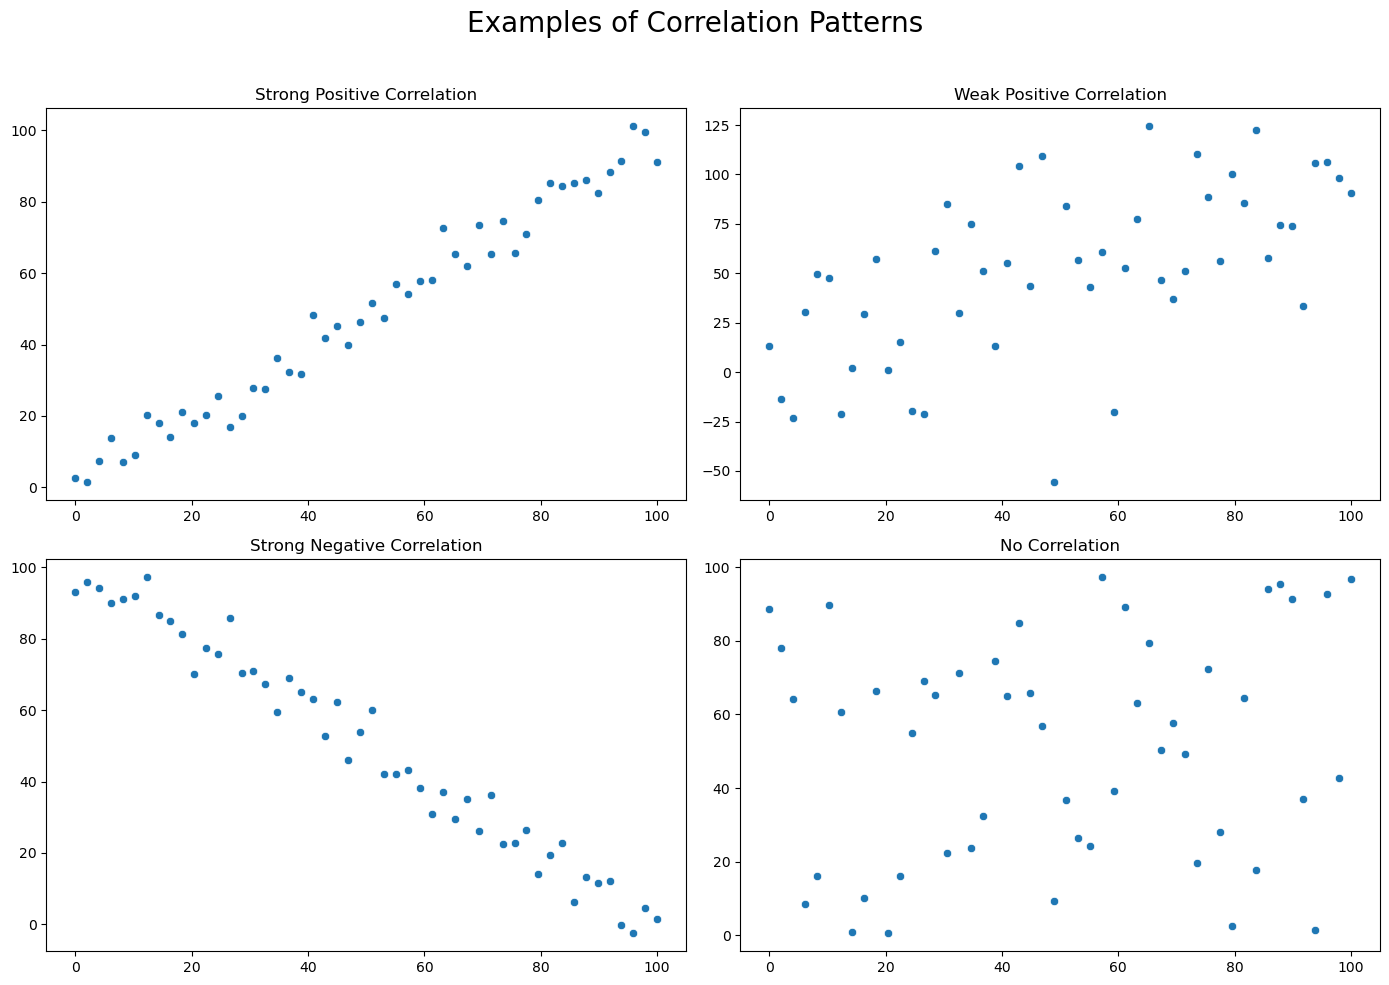

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)

# Generate data for different correlations
x = np.linspace(0, 100, 50)
data_strong_pos = x + np.random.normal(0, 5, 50)
data_weak_pos = x + np.random.normal(0, 40, 50)
data_strong_neg = -x + np.random.normal(0, 5, 50) + 100
data_no_corr = np.random.rand(50) * 100

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Examples of Correlation Patterns', fontsize=20)

sns.scatterplot(x=x, y=data_strong_pos, ax=axs[0, 0]).set_title('Strong Positive Correlation')
sns.scatterplot(x=x, y=data_weak_pos, ax=axs[0, 1]).set_title('Weak Positive Correlation')
sns.scatterplot(x=x, y=data_strong_neg, ax=axs[1, 0]).set_title('Strong Negative Correlation')
sns.scatterplot(x=x, y=data_no_corr, ax=axs[1, 1]).set_title('No Correlation')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- **Positive Correlation:** As one variable increases, the other tends to increase (e.g., Height and Weight).
- **Negative Correlation:** As one variable increases, the other tends to decrease (e.g., A car's age and its resale value).
- **No Correlation:** The points show no pattern. The variables appear unrelated (e.g., A person's shoe size and their IQ score).

## 2. Quantifying the Relationship: `r` and `p`

A scatterplot is great, but we need numbers to be precise. When we analyze correlation, we get two key values: the **correlation coefficient (r)** and the **p-value**.

### The Correlation Coefficient (Pearson's *r*)
This value tells you the **strength and direction** of a *linear* relationship.
- **Range:** It's always between -1 and +1.
- **Strength:** The closer to -1 or +1, the stronger the relationship. Values near 0 mean a weak relationship.
- **Direction:** The sign (`+` or `-`) indicates a positive or negative correlation.

### The P-value: The Test of Significance
Just because we see a correlation in our sample doesn't mean it's real for the whole population—it could be a random fluke. The p-value helps us decide.

- **Null Hypothesis ($H_0$)**: There is no actual correlation in the population (the true correlation is 0).
- **P-value**: The probability of seeing our sample's correlation (or stronger) if the null hypothesis were true.

A small p-value (typically < 0.05) tells us to **reject the null hypothesis**; we have strong evidence that the correlation is real.

## 3. Correlation in Python with `stats.pearsonr`

The `scipy.stats.pearsonr` function is perfect because it returns both the `r` value and the `p-value` in one step.

In [8]:
from scipy import stats
import pandas as pd

# Sample data: Does more study time lead to higher scores?
study_hours = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11]
exam_score  = [65, 70, 75, 80, 85, 90, 95, 94, 96, 98]

# Calculate Pearson's r and the p-value
r_value, p_value = stats.pearsonr(study_hours, exam_score)

print(f"Correlation Coefficient (r): {r_value:.3f}")
print(f"P-value: {p_value:.4f}")

Correlation Coefficient (r): 0.982
P-value: 0.0000


<Axes: >

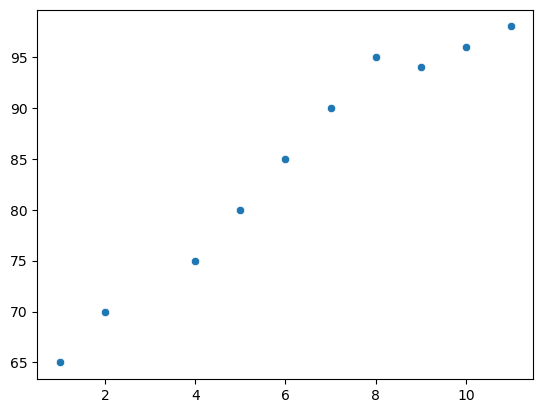

In [9]:
sns.scatterplot(x=study_hours, y=exam_score)

### Interpreting the Results

Here's how an analyst would report this finding:

1.  **Interpret the `r` value:** "The correlation coefficient is `r = 0.966`, which indicates a very strong positive linear relationship between study hours and exam scores."
2.  **Interpret the `p-value`:** "The p-value is `0.0000`, which is significantly less than our alpha of 0.05. Therefore, we reject the null hypothesis and conclude that the observed correlation is statistically significant."

**Analyst's Conclusion:** There is a strong, statistically significant positive correlation between the number of hours a student studies and their final exam score.

Text(0, 0.5, 'y1')

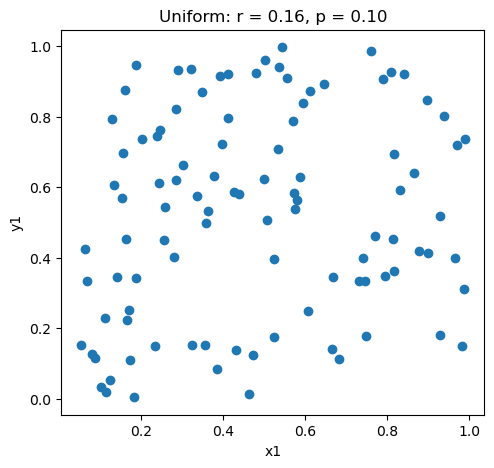

In [11]:
# --- First Example: Uniformly distributed random populations ---
# np.random.seed(0)
x1 = np.random.rand(100)
y1 = np.random.rand(100)

r1, p1 = stats.pearsonr(x1, y1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title(f'Uniform: r = {r1:.2f}, p = {p1:.2f}')
plt.xlabel('x1')
plt.ylabel('y1')


# What will be the correlation here?

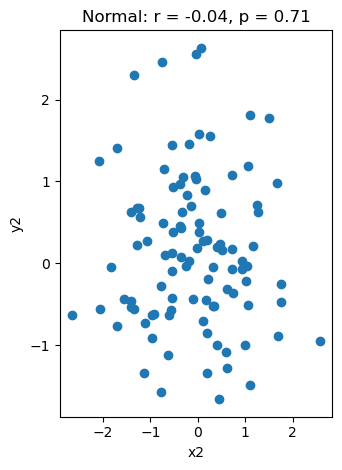

In [12]:

# --- Second Example: Normally distributed populations ---
x2 = np.random.randn(100)
y2 = np.random.randn(100)

r2, p2 = stats.pearsonr(x2, y2)

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title(f'Normal: r = {r2:.2f}, p = {p2:.2f}')
plt.xlabel('x2')
plt.ylabel('y2')

plt.tight_layout()
plt.show()

# What will be the correlation here?


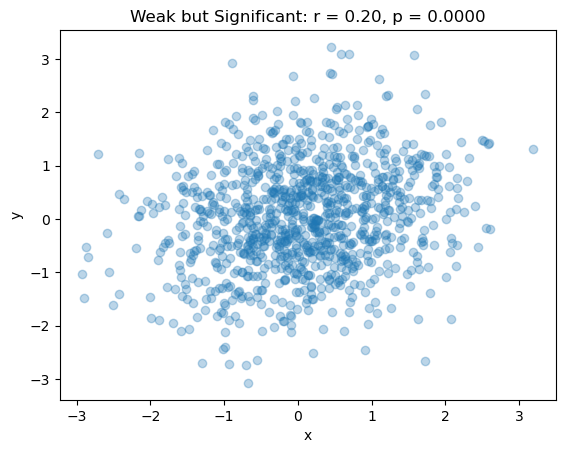

In [13]:
n = 1000
x = np.random.randn(n)
y = 0.2 * x + np.random.randn(n)  # weak correlation

r, p = stats.pearsonr(x, y)

plt.scatter(x, y, alpha=0.3)
plt.title(f'Weak but Significant: r = {r:.2f}, p = {p:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## 4. The Golden Rule: Correlation ≠ Causation

This is the most important lesson. **Just because two variables are correlated does not mean one causes the other.**

**Classic Example:** Ice cream sales are strongly correlated with shark attacks. Does eating ice cream cause shark attacks? No. A hidden third variable, **hot weather**, is the true cause. Hot weather makes more people buy ice cream and makes more people go swimming.

Always look for these hidden "confounding variables" and never assume causation from correlation alone.

## 5. Correlation between two categorial Variable!